<a href="https://colab.research.google.com/github/hongqin/Python-CoLab-bootcamp/blob/master/Learn_Python_by_analying_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Python to analyze the Covid19 data
Hong Qin

Video at https://youtu.be/1JDP4o92tss 

These materials are for education only.


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
### Import libraries
import pandas as pd # primary data structure library

# Part1. Get JHU COVID19 Data into Python

This data is collected from repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).https://github.com/CSSEGISandData/COVID-19

In [5]:
### Select data path
# Define the path to the file containing COVID-19 confirmed cases data for the United States
#fullpath1= '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'

# Alternatively, use the URL to fetch the file containing COVID-19 confirmed cases data for the United States
fullpath1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'

# Read the data from the specified file into a Pandas DataFrame
df1 = pd.read_csv(fullpath1, error_bad_lines=False)

# Define the path to the file containing global COVID-19 confirmed cases data
#fullpath2 = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

# Alternatively, use the URL to fetch the file containing global COVID-19 confirmed cases data
fullpath2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

# Read the data from the specified file into another Pandas DataFrame
df2 = pd.read_csv(fullpath2, error_bad_lines=False)


<ipython-input-5-b6372f1c639f>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(fullpath1, error_bad_lines=False)
<ipython-input-5-b6372f1c639f>:18: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df2 = pd.read_csv(fullpath2, error_bad_lines=False)


## DataFrame is Python Pandas word for Excel spreadsheet

# Part 2. Explore USA time series by counties

In [ ]:
df1.shape

(3342, 1154)

view the dataframe

In [ ]:
df1.head()

UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
0  32.539527 -86.644082  ...   19732   19759   19759   19759   19759   19759   
1  30.727750 -87.722071  ...   69641   69767   69767   69767   69767   69767   
2  31.868263 -85.387129  ...    7451    7474    7474    7474    7474    7474   
3  32.996421 -87.125115  ...    8067    8087    8087    8087    8087    8087   
4  33.982109 -86.567906  ...   18616   18673   18673   18673   18673   18673   

   3/6/23  3/7/23  3/8/23  3/9/23  
0   19759   19759   19790   19790  
1   69767   69767   69860   69860  
2    7474    7474    7485    7485  
3    8087    8087    8091    8091  
4   18673   18673   18704   18704  

[5 rows x 1154 columns]

How to find out the columns?

In [ ]:
#dir(df1)

In [ ]:
df1.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1154)

In [ ]:
df1.tail()

UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
3337  84056039   US  USA    840  56039.0       Teton        Wyoming   
3338  84056041   US  USA    840  56041.0       Uinta        Wyoming   
3339  84090056   US  USA    840  90056.0  Unassigned        Wyoming   
3340  84056043   US  USA    840  56043.0    Washakie        Wyoming   
3341  84056045   US  USA    840  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_  ... 2/28/23  3/1/23  3/2/23  \
3337             US  43.935225 -110.589080  ...   12130   12130   12130   
3338             US  41.287818 -110.547578  ...    6401    6401    6401   
3339             US   0.000000    0.000000  ...       0       0       0   
3340             US  43.904516 -107.680187  ...    2750    2750    2750   
3341             US  43.839612 -104.567488  ...    1905    1905    1905   

      3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
3337   12130   12130   12130   12130   12134   12134   12134  
3338    6401    6401    6401    6401    6406    6406    6406  
3339       0       0       0       0       0       0       0  
3340    2750    2750    2750    2750    2755    2755    2755  
3341    1905    1905    1905    1905    1905    1905    1905  

[5 rows x 1154 columns]

In [ ]:
df1

UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0     84001001   US  USA    840   1001.0     Autauga        Alabama   
1     84001003   US  USA    840   1003.0     Baldwin        Alabama   
2     84001005   US  USA    840   1005.0     Barbour        Alabama   
3     84001007   US  USA    840   1007.0        Bibb        Alabama   
4     84001009   US  USA    840   1009.0      Blount        Alabama   
...        ...  ...  ...    ...      ...         ...            ...   
3337  84056039   US  USA    840  56039.0       Teton        Wyoming   
3338  84056041   US  USA    840  56041.0       Uinta        Wyoming   
3339  84090056   US  USA    840  90056.0  Unassigned        Wyoming   
3340  84056043   US  USA    840  56043.0    Washakie        Wyoming   
3341  84056045   US  USA    840  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_  ... 2/28/23  3/1/23  3/2/23  \
0                US  32.539527  -86.644082  ...   19732   19759   19759   
1                US  30.727750  -87.722071  ...   69641   69767   69767   
2                US  31.868263  -85.387129  ...    7451    7474    7474   
3                US  32.996421  -87.125115  ...    8067    8087    8087   
4                US  33.982109  -86.567906  ...   18616   18673   18673   
...             ...        ...         ...  ...     ...     ...     ...   
3337             US  43.935225 -110.589080  ...   12130   12130   12130   
3338             US  41.287818 -110.547578  ...    6401    6401    6401   
3339             US   0.000000    0.000000  ...       0       0       0   
3340             US  43.904516 -107.680187  ...    2750    2750    2750   
3341             US  43.839612 -104.567488  ...    1905    1905    1905   

      3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0      19759   19759   19759   19759   19759   19790   19790  
1      69767   69767   69767   69767   69767   69860   69860  
2       7474    7474    7474    7474    7474    7485    7485  
3       8087    8087    8087    8087    8087    8091    8091  
4      18673   18673   18673   18673   18673   18704   18704  
...      ...     ...     ...     ...     ...     ...     ...  
3337   12130   12130   12130   12130   12134   12134   12134  
3338    6401    6401    6401    6401    6406    6406    6406  
3339       0       0       0       0       0       0       0  
3340    2750    2750    2750    2750    2755    2755    2755  
3341    1905    1905    1905    1905    1905    1905    1905  

[3342 rows x 1154 columns]

In [7]:
df1['Lat'][3337:3339]

3337    43.935225
3338    41.287818
Name: Lat, dtype: float64

In [ ]:
df1.iloc[3337:3340, 8:11] #be aware that Python is typically end-exclusive! 

Lat       Long_             Combined_Key
3337  43.935225 -110.589080       Teton, Wyoming, US
3338  41.287818 -110.547578       Uinta, Wyoming, US
3339   0.000000    0.000000  Unassigned, Wyoming, US

How to find out dataframe dimensions

In [ ]:
print ('dataframe dimensions:', df1.shape)

dataframe dimensions: (3342, 1154)


How many "province states" are there in this data set?

In [ ]:
df1.Province_State.unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [ ]:
len(df1.Province_State.unique())

58

### Q, what is the larged case value in this data set? 

In [9]:
# Select all rows and columns starting from the 11th column (index 11) in DataFrame df1
# Then, apply the max() function to find the maximum value along each column
# Finally, apply the max() function again to find the maximum value across all columns
df1.iloc[:, 11:].max().max()


3710586

In [ ]:
df1.idxmax

<bound method DataFrame.idxmax of            UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0     84001001   US  USA    840   1001.0     Autauga        Alabama   
1     84001003   US  USA    840   1003.0     Baldwin        Alabama   
2     84001005   US  USA    840   1005.0     Barbour        Alabama   
3     84001007   US  USA    840   1007.0        Bibb        Alabama   
4     84001009   US  USA    840   1009.0      Blount        Alabama   
...        ...  ...  ...    ...      ...         ...            ...   
3337  84056039   US  USA    840  56039.0       Teton        Wyoming   
3338  84056041   US  USA    840  56041.0       Uinta        Wyoming   
3339  84090056   US  USA    840  90056.0  Unassigned        Wyoming   
3340  84056043   US  USA    840  56043.0    Washakie        Wyoming   
3341  84056045   US  USA    840  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_  ... 2/28/23  3/1/23  3/2/23  \
0                US  32.539527  -86.64

Find out which row has the largest value for column '10/18/22'

In [ ]:
df1["10/18/22"].max()

3472418

## Find out which row has the largest value. 

In [ ]:
df1.loc[df1['10/18/22']>=3472418]

UID iso2 iso3  code3    FIPS       Admin2 Province_State  \
215  84006037   US  USA    840  6037.0  Los Angeles     California   

    Country_Region        Lat       Long_  ...  2/28/23   3/1/23   3/2/23  \
215             US  34.308284 -118.228241  ...  3697797  3697797  3704034   

      3/3/23   3/4/23   3/5/23   3/6/23   3/7/23   3/8/23   3/9/23  
215  3705381  3705381  3705381  3705381  3705381  3705381  3710586  

[1 rows x 1154 columns]

In [11]:
#ChatGPT
# Find the row index with the largest values from columns 11 and beyond
row_index = df1.iloc[:, 11:].sum(axis=1).idxmax()

# Get the row with the largest values
row_with_largest_values = df1.iloc[row_index]

# Print the row or perform further operations with it
print("Row with the largest values:")
print(row_with_largest_values)

Row with the largest values:
UID       84006037
iso2            US
iso3           USA
code3          840
FIPS        6037.0
            ...   
3/5/23     3705381
3/6/23     3705381
3/7/23     3705381
3/8/23     3705381
3/9/23     3710586
Name: 215, Length: 1154, dtype: object


In [12]:
#prompt Revise the above code to print out the values of Admin2	and Province_State of df1 for the largest values.

# Find the row index with the largest values from columns 11 and beyond
row_index = df1.iloc[:, 11:].sum(axis=1).idxmax()

# Get the values of "Admin2" and "Province_State" for the row with the largest values
admin2_value = df1.loc[row_index, "Admin2"]
province_state_value = df1.loc[row_index, "Province_State"]

# Print the values
print("Row with the largest values:")
print("Admin2:", admin2_value)
print("Province_State:", province_state_value)

Row with the largest values:
Admin2: Los Angeles
Province_State: California


## plot
Because pandas do plot by columns, JHU data set put time series by row. So, we have to transpose the JHU dataframe. 

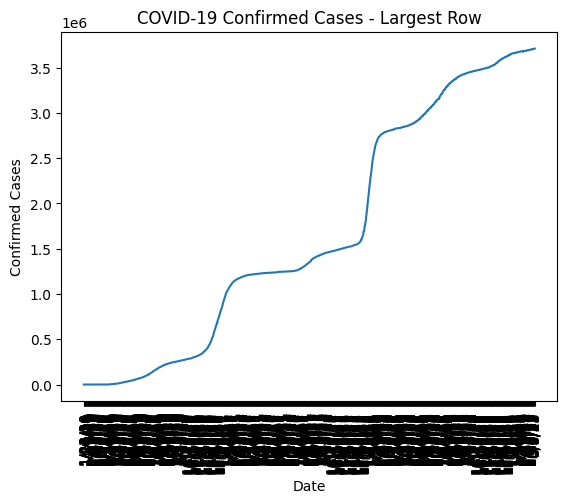

In [15]:
#chatGPT version
#prompt In df1, columns 11 and beyond are dates that contain values for COVID19 confirmed cases. 
# Write coLab Python code to plot the row that contains the largest cases, as shown in the above code.

import matplotlib.pyplot as plt

# Find the row index with the largest values from columns 11 and beyond
row_index = df1.iloc[:, 11:].sum(axis=1).idxmax()

# Get the row with the largest values
row_with_largest_values = df1.iloc[row_index]

# Extract the dates and case values from the row
dates = df1.columns[11:]
cases = row_with_largest_values[11:]

# Plot the row with the largest cases
plt.plot(dates, cases)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("COVID-19 Confirmed Cases - Largest Row")
plt.xticks(rotation=90)
plt.show()


In [14]:
LA = df1.iloc[215, 11:]
type(LA)

pandas.core.series.Series

<Axes: >

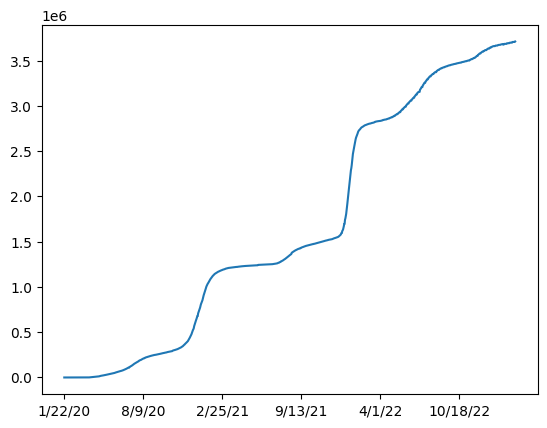

In [ ]:
#print(LA)
LA.plot()

In [ ]:
df1.head()

UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
0  32.539527 -86.644082  ...   19732   19759   19759   19759   19759   19759   
1  30.727750 -87.722071  ...   69641   69767   69767   69767   69767   69767   
2  31.868263 -85.387129  ...    7451    7474    7474    7474    7474    7474   
3  32.996421 -87.125115  ...    8067    8087    8087    8087    8087    8087   
4  33.982109 -86.567906  ...   18616   18673   18673   18673   18673   18673   

   3/6/23  3/7/23  3/8/23  3/9/23  
0   19759   19759   19790   19790  
1   69767   69767   69860   69860  
2    7474    7474    7485    7485  
3    8087    8087    8091    8091  
4   18673   18673   18704   18704  

[5 rows x 1154 columns]

In [ ]:
df1.iloc[:, 11:].head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   1/30/20  1/31/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
0        0        0  ...    19732   19759   19759   19759   19759   19759   
1        0        0  ...    69641   69767   69767   69767   69767   69767   
2        0        0  ...     7451    7474    7474    7474    7474    7474   
3        0        0  ...     8067    8087    8087    8087    8087    8087   
4        0        0  ...    18616   18673   18673   18673   18673   18673   

   3/6/23  3/7/23  3/8/23  3/9/23  
0   19759   19759   19790   19790  
1   69767   69767   69860   69860  
2    7474    7474    7485    7485  
3    8087    8087    8091    8091  
4   18673   18673   18704   18704  

[5 rows x 1143 columns]

In [ ]:
UScases = df1.iloc[0:3, 11:].transpose() 
UScases.shape
UScases

0      1     2
1/22/20      0      0     0
1/23/20      0      0     0
1/24/20      0      0     0
1/25/20      0      0     0
1/26/20      0      0     0
...        ...    ...   ...
3/5/23   19759  69767  7474
3/6/23   19759  69767  7474
3/7/23   19759  69767  7474
3/8/23   19790  69860  7485
3/9/23   19790  69860  7485

[1143 rows x 3 columns]

<Axes: >

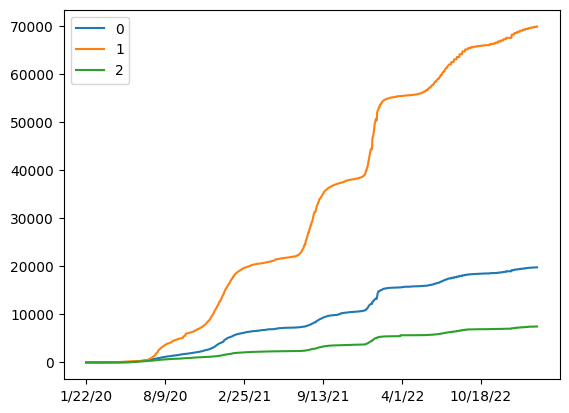

In [ ]:
UScases.plot()

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

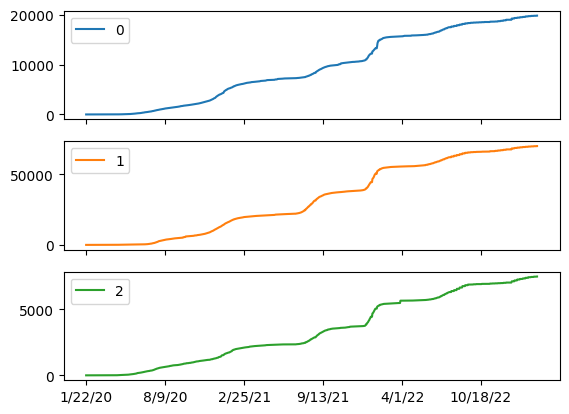

In [ ]:
UScases.plot(subplots=True)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

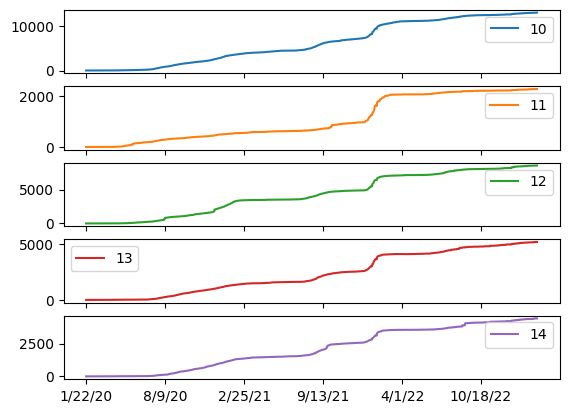

In [ ]:
df1.iloc[10:15, 11:].transpose().plot(subplots=True)

## Add meaningful index to the dataframe

In [ ]:
# one way is to load csv with index 
df1 = pd.read_csv(fullpath1, error_bad_lines=False, index_col=10) #10th index picks 11th column of "Combined_Key"
df1.reset_index(drop=True)
df1.index

<ipython-input-36-b158658a5edc>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(fullpath1, error_bad_lines=False, index_col=10) #10th index picks 11th column of "Combined_Key"


Index(['Autauga, Alabama, US', 'Baldwin, Alabama, US', 'Barbour, Alabama, US',
       'Bibb, Alabama, US', 'Blount, Alabama, US', 'Bullock, Alabama, US',
       'Butler, Alabama, US', 'Calhoun, Alabama, US', 'Chambers, Alabama, US',
       'Cherokee, Alabama, US',
       ...
       'Park, Wyoming, US', 'Platte, Wyoming, US', 'Sheridan, Wyoming, US',
       'Sublette, Wyoming, US', 'Sweetwater, Wyoming, US',
       'Teton, Wyoming, US', 'Uinta, Wyoming, US', 'Unassigned, Wyoming, US',
       'Washakie, Wyoming, US', 'Weston, Wyoming, US'],
      dtype='object', name='Combined_Key', length=3342)

In [ ]:
df1.iloc[:,11:].transpose().head()

Combined_Key  Autauga, Alabama, US  Baldwin, Alabama, US  \
1/23/20                          0                     0   
1/24/20                          0                     0   
1/25/20                          0                     0   
1/26/20                          0                     0   
1/27/20                          0                     0   

Combined_Key  Barbour, Alabama, US  Bibb, Alabama, US  Blount, Alabama, US  \
1/23/20                          0                  0                    0   
1/24/20                          0                  0                    0   
1/25/20                          0                  0                    0   
1/26/20                          0                  0                    0   
1/27/20                          0                  0                    0   

Combined_Key  Bullock, Alabama, US  Butler, Alabama, US  Calhoun, Alabama, US  \
1/23/20                          0                    0                     0   
1/24/20                          0                    0                     0   
1/25/20                          0                    0                     0   
1/26/20                          0                    0                     0   
1/27/20                          0                    0                     0   

Combined_Key  Chambers, Alabama, US  Cherokee, Alabama, US  ...  \
1/23/20                           0                      0  ...   
1/24/20                           0                      0  ...   
1/25/20                           0                      0  ...   
1/26/20                           0                      0  ...   
1/27/20                           0                      0  ...   

Combined_Key  Park, Wyoming, US  Platte, Wyoming, US  Sheridan, Wyoming, US  \
1/23/20                       0                    0                      0   
1/24/20                       0                    0                      0   
1/25/20                       0                    0                      0   
1/26/20                       0                    0                      0   
1/27/20                       0                    0                      0   

Combined_Key  Sublette, Wyoming, US  Sweetwater, Wyoming, US  \
1/23/20                           0                        0   
1/24/20                           0                        0   
1/25/20                           0                        0   
1/26/20                           0                        0   
1/27/20                           0                        0   

Combined_Key  Teton, Wyoming, US  Uinta, Wyoming, US  Unassigned, Wyoming, US  \
1/23/20                        0                   0                        0   
1/24/20                        0                   0                        0   
1/25/20                        0                   0                        0   
1/26/20                        0                   0                        0   
1/27/20                        0                   0                        0   

Combined_Key  Washakie, Wyoming, US  Weston, Wyoming, US  
1/23/20                           0                    0  
1/24/20                           0                    0  
1/25/20                           0                    0  
1/26/20                           0                    0  
1/27/20                           0                    0  

[5 rows x 3342 columns]

In [ ]:
# another way is to re-assign index
df1 = pd.read_csv(fullpath1, error_bad_lines=False)
newrows = list( df1['Combined_Key'])
df1.index =  newrows
df1.shape

<ipython-input-38-39ec4878417f>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(fullpath1, error_bad_lines=False)


(3342, 1154)

In [ ]:
df1.head()

UID iso2 iso3  code3    FIPS   Admin2  \
Autauga, Alabama, US  84001001   US  USA    840  1001.0  Autauga   
Baldwin, Alabama, US  84001003   US  USA    840  1003.0  Baldwin   
Barbour, Alabama, US  84001005   US  USA    840  1005.0  Barbour   
Bibb, Alabama, US     84001007   US  USA    840  1007.0     Bibb   
Blount, Alabama, US   84001009   US  USA    840  1009.0   Blount   

                     Province_State Country_Region        Lat      Long_  ...  \
Autauga, Alabama, US        Alabama             US  32.539527 -86.644082  ...   
Baldwin, Alabama, US        Alabama             US  30.727750 -87.722071  ...   
Barbour, Alabama, US        Alabama             US  31.868263 -85.387129  ...   
Bibb, Alabama, US           Alabama             US  32.996421 -87.125115  ...   
Blount, Alabama, US         Alabama             US  33.982109 -86.567906  ...   

                     2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  3/6/23  \
Autauga, Alabama, US   19732   19759   19759   19759   19759   19759   19759   
Baldwin, Alabama, US   69641   69767   69767   69767   69767   69767   69767   
Barbour, Alabama, US    7451    7474    7474    7474    7474    7474    7474   
Bibb, Alabama, US       8067    8087    8087    8087    8087    8087    8087   
Blount, Alabama, US    18616   18673   18673   18673   18673   18673   18673   

                      3/7/23  3/8/23  3/9/23  
Autauga, Alabama, US   19759   19790   19790  
Baldwin, Alabama, US   69767   69860   69860  
Barbour, Alabama, US    7474    7485    7485  
Bibb, Alabama, US       8087    8091    8091  
Blount, Alabama, US    18673   18704   18704  

[5 rows x 1154 columns]

In [ ]:
list(df1['Combined_Key'] )[1:10]

['Baldwin, Alabama, US',
 'Barbour, Alabama, US',
 'Bibb, Alabama, US',
 'Blount, Alabama, US',
 'Bullock, Alabama, US',
 'Butler, Alabama, US',
 'Calhoun, Alabama, US',
 'Chambers, Alabama, US',
 'Cherokee, Alabama, US']

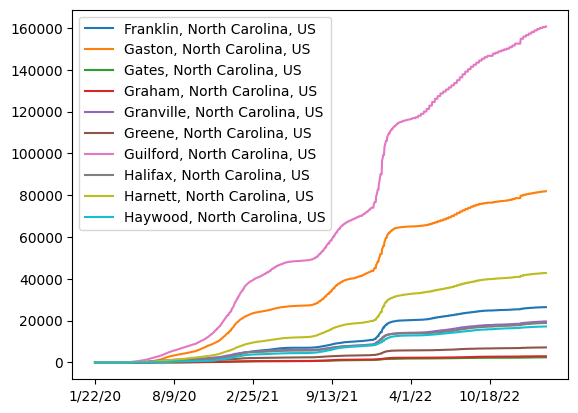

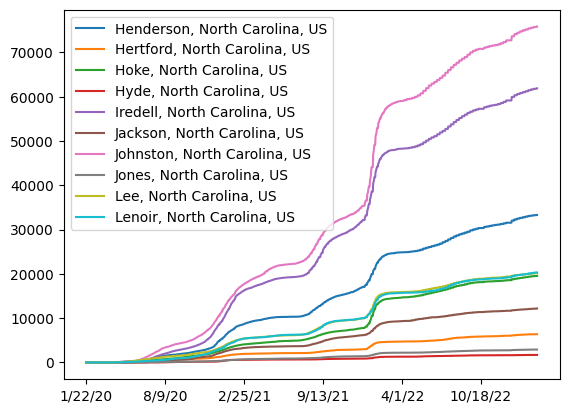

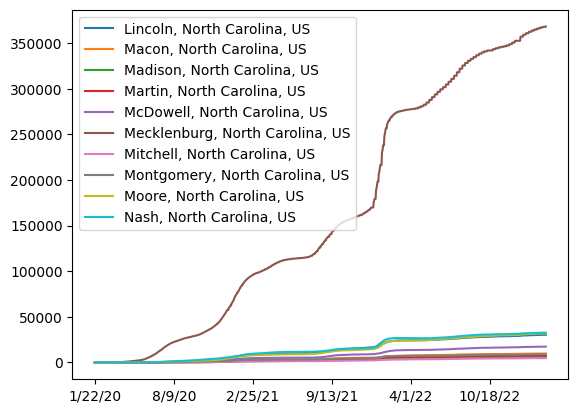

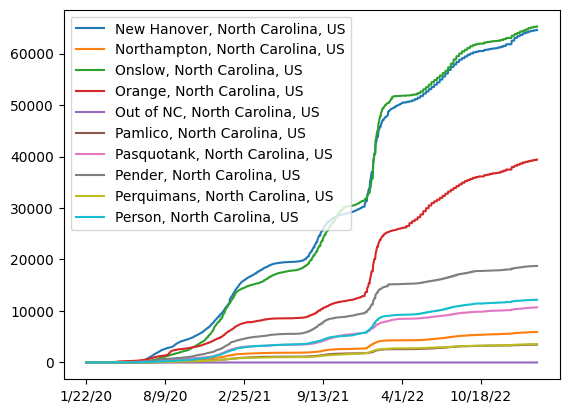

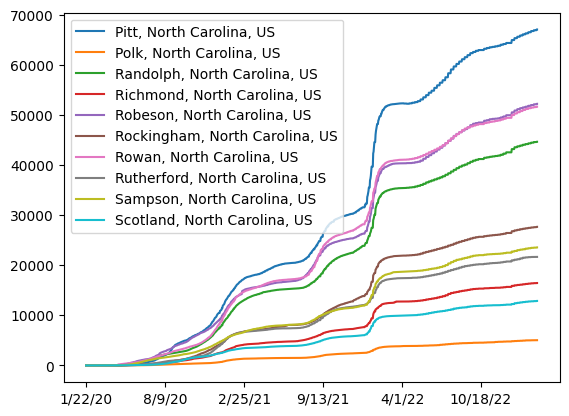

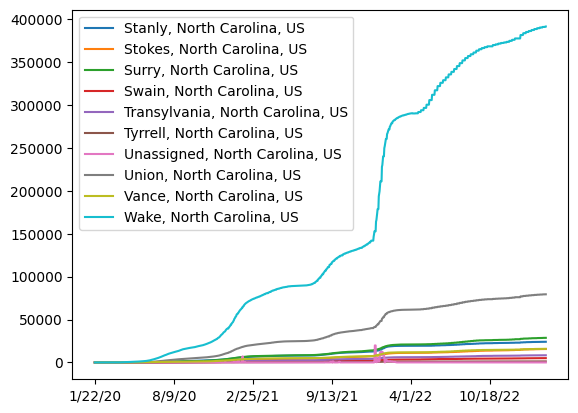

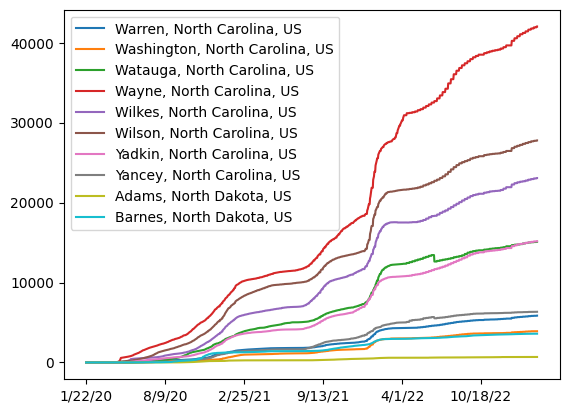

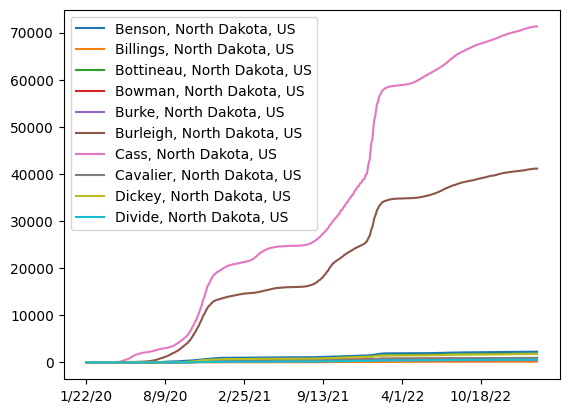

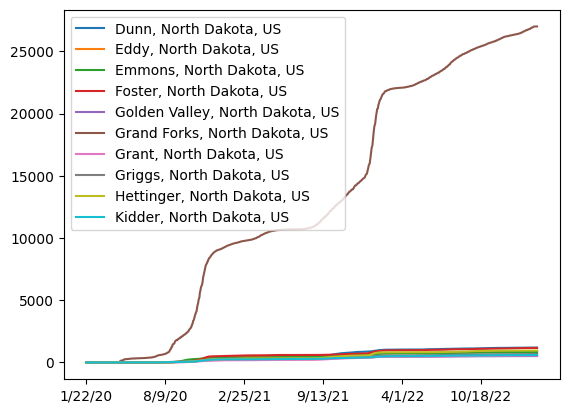

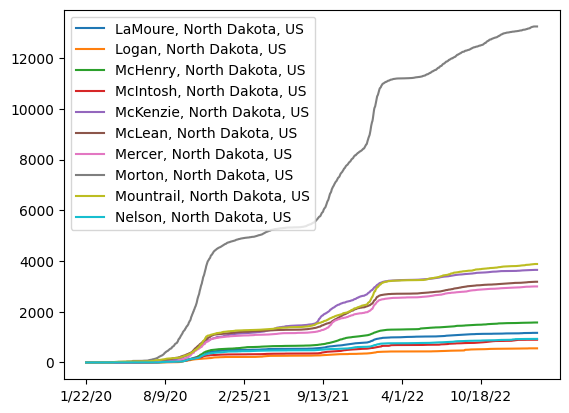

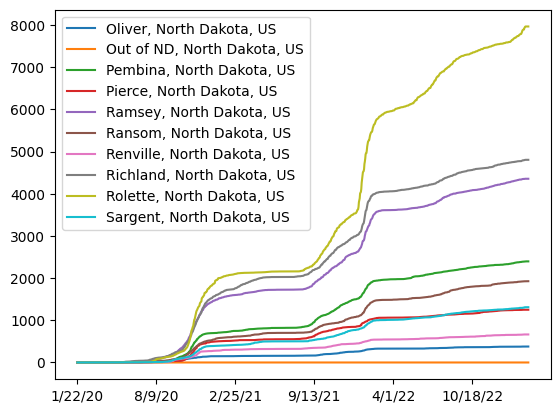

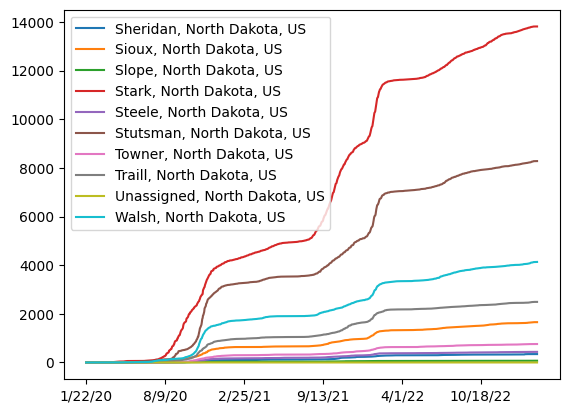

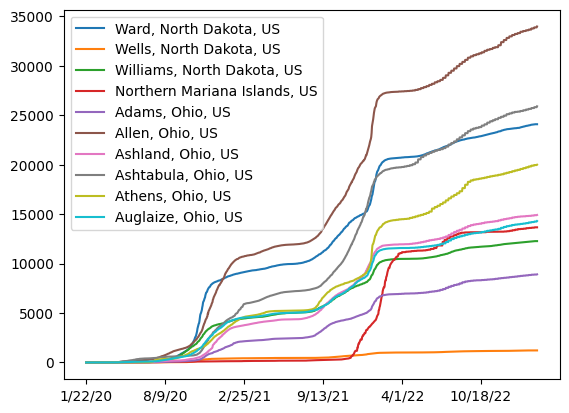

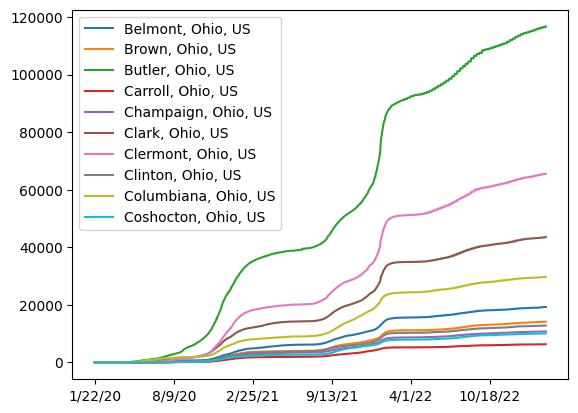

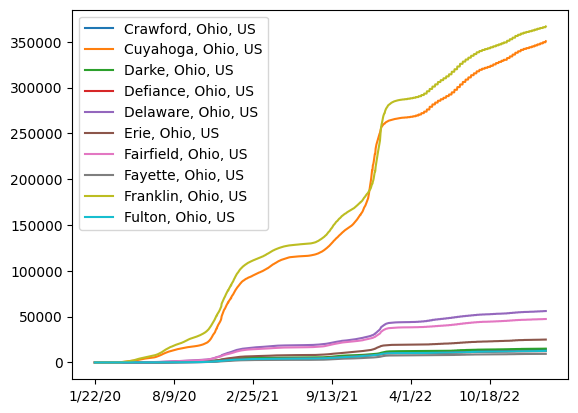

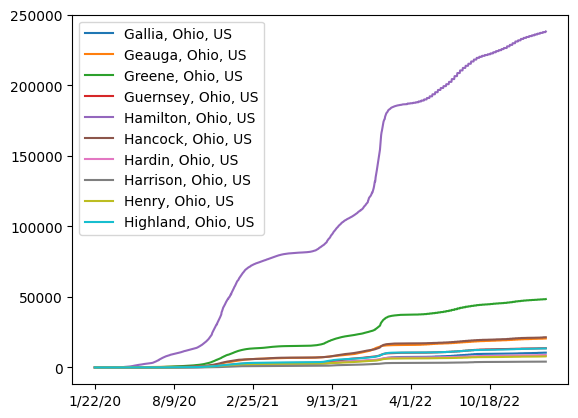

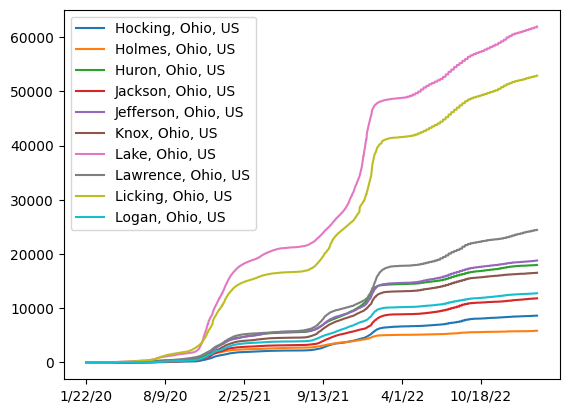

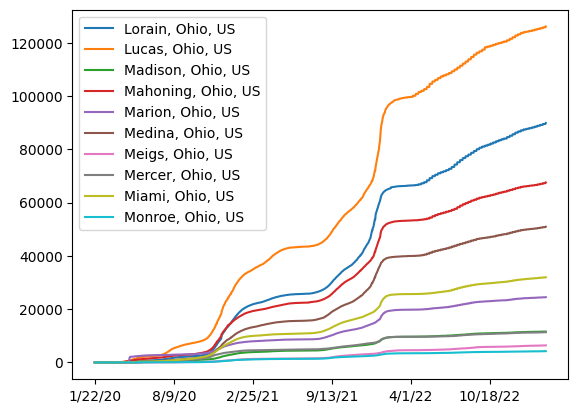

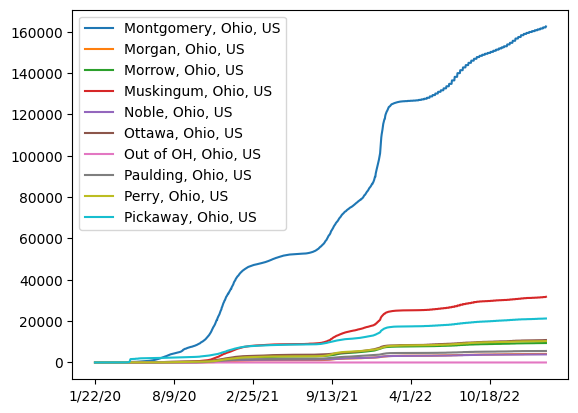

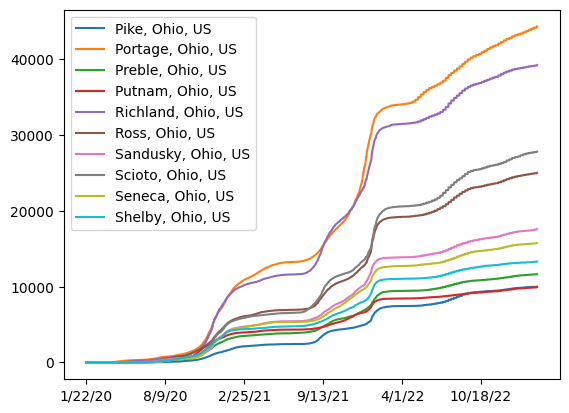

In [ ]:
step = 10
for i in range(2000, 2200, step):
#for i in range(0, 3340, step):
  UScases = df1.iloc[ i : (i+step), 11:].transpose().plot()

In [ ]:
df1.tail()

UID iso2 iso3  code3     FIPS      Admin2  \
Teton, Wyoming, US       84056039   US  USA    840  56039.0       Teton   
Uinta, Wyoming, US       84056041   US  USA    840  56041.0       Uinta   
Unassigned, Wyoming, US  84090056   US  USA    840  90056.0  Unassigned   
Washakie, Wyoming, US    84056043   US  USA    840  56043.0    Washakie   
Weston, Wyoming, US      84056045   US  USA    840  56045.0      Weston   

                        Province_State Country_Region        Lat       Long_  \
Teton, Wyoming, US             Wyoming             US  43.935225 -110.589080   
Uinta, Wyoming, US             Wyoming             US  41.287818 -110.547578   
Unassigned, Wyoming, US        Wyoming             US   0.000000    0.000000   
Washakie, Wyoming, US          Wyoming             US  43.904516 -107.680187   
Weston, Wyoming, US            Wyoming             US  43.839612 -104.567488   

                         ... 2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
Teton, Wyoming, US       ...   12130   12130   12130   12130   12130   12130   
Uinta, Wyoming, US       ...    6401    6401    6401    6401    6401    6401   
Unassigned, Wyoming, US  ...       0       0       0       0       0       0   
Washakie, Wyoming, US    ...    2750    2750    2750    2750    2750    2750   
Weston, Wyoming, US      ...    1905    1905    1905    1905    1905    1905   

                         3/6/23  3/7/23  3/8/23  3/9/23  
Teton, Wyoming, US        12130   12134   12134   12134  
Uinta, Wyoming, US         6401    6406    6406    6406  
Unassigned, Wyoming, US       0       0       0       0  
Washakie, Wyoming, US      2750    2755    2755    2755  
Weston, Wyoming, US        1905    1905    1905    1905  

[5 rows x 1154 columns]

## Note. It turns out that there are unassigned cases in some states, such as Wyoming. Thse unassigned cases become zero when they are settled. 

<Axes: >

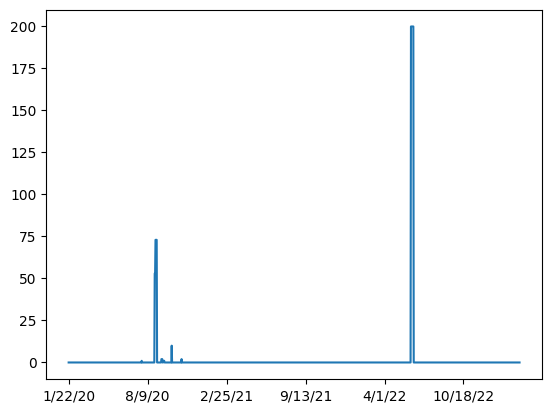

In [ ]:
df1.loc['Unassigned, Wyoming, US', ][11:].plot()

In [ ]:
df1.loc[ df1.index.str.contains('Unassigned'), ].shape

(52, 1154)

Quetions: Why are there 52 unassigned rows? 

In [ ]:

df1.loc[ df1.index.str.contains('Unassigned'), ]

UID iso2 iso3  code3     FIPS  \
Unassigned, Alabama, US               84090001   US  USA    840  90001.0   
Unassigned, Alaska, US                84090002   US  USA    840  90002.0   
Unassigned, Arizona, US               84090004   US  USA    840  90004.0   
Unassigned, Arkansas, US              84090005   US  USA    840  90005.0   
Unassigned, California, US            84090006   US  USA    840  90006.0   
Unassigned, Colorado, US              84090008   US  USA    840  90008.0   
Unassigned, Connecticut, US           84090009   US  USA    840  90009.0   
Unassigned, Delaware, US              84090010   US  USA    840  90010.0   
Unassigned, District of Columbia, US  84090011   US  USA    840  90011.0   
Unassigned, Florida, US               84090012   US  USA    840  90012.0   
Unassigned, Georgia, US               84090013   US  USA    840  90013.0   
Unassigned, Hawaii, US                84090015   US  USA    840  90015.0   
Unassigned, Idaho, US                 84090016   US  USA    840  90016.0   
Unassigned, Illinois, US              84090017   US  USA    840  90017.0   
Unassigned, Indiana, US               84090018   US  USA    840  90018.0   
Unassigned, Iowa, US                  84090019   US  USA    840  90019.0   
Unassigned, Kansas, US                84090020   US  USA    840  90020.0   
Unassigned, Kentucky, US              84090021   US  USA    840  90021.0   
Unassigned, Louisiana, US             84090022   US  USA    840  90022.0   
Unassigned, Maine, US                 84090023   US  USA    840  90023.0   
Unassigned, Maryland, US              84090024   US  USA    840  90024.0   
Unassigned, Massachusetts, US         84090025   US  USA    840  90025.0   
Unassigned, Michigan, US              84090026   US  USA    840  90026.0   
Unassigned, Minnesota, US             84090027   US  USA    840  90027.0   
Unassigned, Mississippi, US           84090028   US  USA    840  90028.0   
Unassigned, Missouri, US              84090029   US  USA    840  90029.0   
Unassigned, Montana, US               84090030   US  USA    840  90030.0   
Unassigned, Nebraska, US              84090031   US  USA    840  90031.0   
Unassigned, Nevada, US                84090032   US  USA    840  90032.0   
Unassigned, New Hampshire, US         84090033   US  USA    840  90033.0   
Unassigned, New Jersey, US            84090034   US  USA    840  90034.0   
Unassigned, New Mexico, US            84090035   US  USA    840  90035.0   
Unassigned, New York, US              84090036   US  USA    840  90036.0   
Unassigned, North Carolina, US        84090037   US  USA    840  90037.0   
Unassigned, North Dakota, US          84090038   US  USA    840  90038.0   
Unassigned, Ohio, US                  84090039   US  USA    840  90039.0   
Unassigned, Oklahoma, US              84090040   US  USA    840  90040.0   
Unassigned, Oregon, US                84090041   US  USA    840  90041.0   
Unassigned, Pennsylvania, US          84090042   US  USA    840  90042.0   
Unassigned, Puerto Rico, US           63072999   PR  PRI    630  72999.0   
Unassigned, Rhode Island, US          84090044   US  USA    840  90044.0   
Unassigned, South Carolina, US        84090045   US  USA    840  90045.0   
Unassigned, South Dakota, US          84090046   US  USA    840  90046.0   
Unassigned, Tennessee, US             84090047   US  USA    840  90047.0   
Unassigned, Texas, US                 84090048   US  USA    840  90048.0   
Unassigned, Utah, US                  84090049   US  USA    840  90049.0   
Unassigned, Vermont, US               84090050   US  USA    840  90050.0   
Unassigned, Virginia, US              84090051   US  USA    840  90051.0   
Unassigned, Washington, US            84090053   US  USA    840  90053.0   
Unassigned, West Virginia, US         84090054   US  USA    840  90054.0   
Unassigned, Wisconsin, US             84090055   US  USA    840  90055.0   
Unassigned, Wyoming, US               84090056   US  USA    840  90056.0   

              

Challenge and Question: Write a one-line code to plot all of the 'unassigned' rows.

In [ ]:
# df1.loc[df1.index.str.contains('Unassigned'), ].plot() #No, this is not working properly

In [ ]:
# df1.loc[df1.index.str.contains("Unsassigned"),11:].plot() #error 

In [ ]:
# df1.loc[df1.index.str.contains("Unassigned")][11:].plot() #wrong plot

In [ ]:
#df1.loc[df1.index.str.contains('Unassigned'), :][:,11:]

<Axes: >

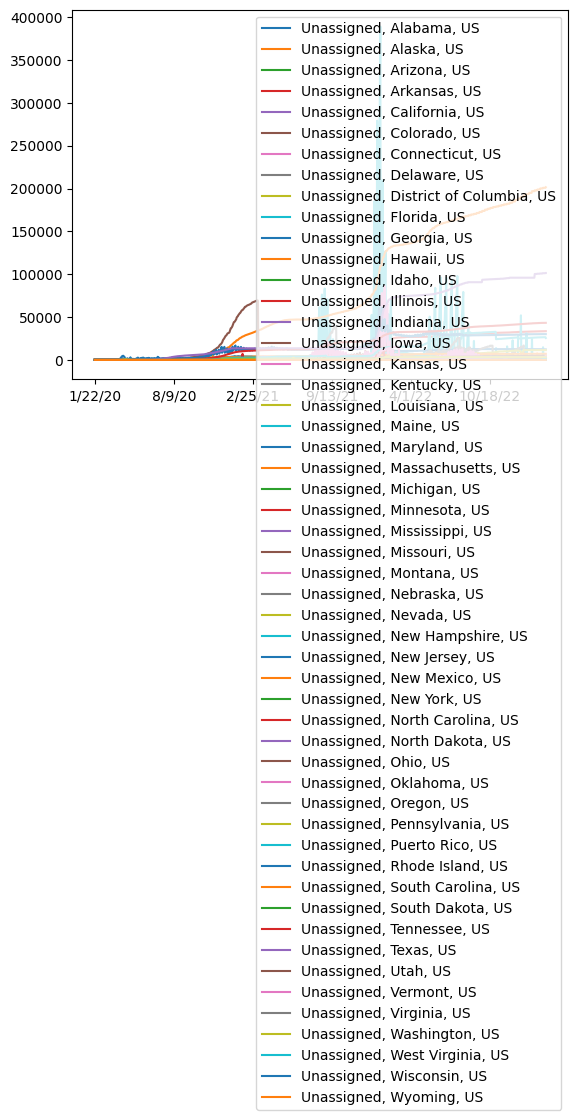

In [ ]:
unassigned_df = df1.loc[df1.index.str.contains('Unassigned')]
unassigned_df.iloc[ :, 11:].shape
unassigned_df.iloc[ :, 11:].transpose().plot()

<Axes: >

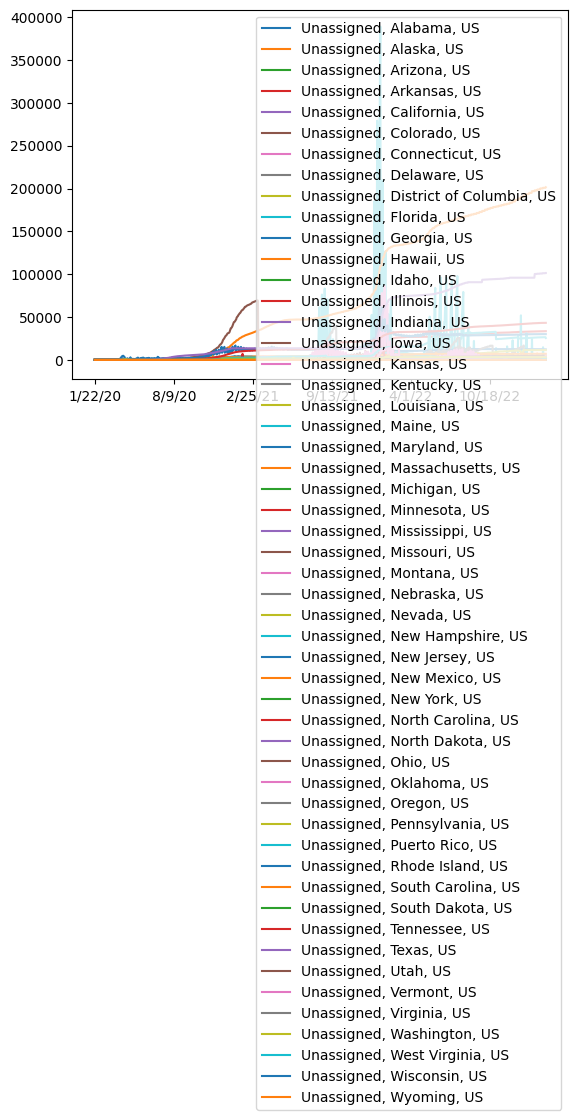

In [ ]:
df1.loc[df1.index.str.contains('Unassigned')].iloc[:, 11:].transpose().plot() # Well done, an one-line solution! 

<Axes: >

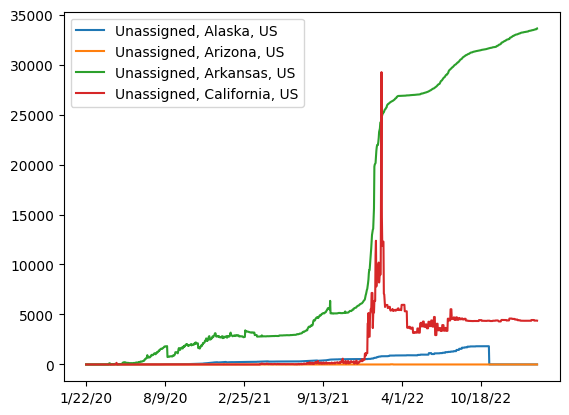

In [ ]:
df1.loc[df1.index.str.contains('Unassigned')].iloc[ :, 11:].transpose().iloc[:,1:5].plot() #subsetting for clarity

## How about the cases at the Hamilton county, TN? 

In [ ]:
# Can we examine cumualted cases at the Hamilton County, TN? 


df1.loc[df1['Combined_Key'] == 'Bronx, New York, US']

UID iso2 iso3  code3     FIPS Admin2 Province_State  \
Bronx, New York, US  84036005   US  USA    840  36005.0  Bronx       New York   

                    Country_Region        Lat      Long_  ... 2/28/23  3/1/23  \
Bronx, New York, US             US  40.852093 -73.862828  ...  552283  552341   

                     3/2/23  3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  \
Bronx, New York, US  552507  552610  552610  552610  552911  552962  553001   

                     3/9/23  
Bronx, New York, US  553117  

[1 rows x 1154 columns]

In [ ]:
dfHamilton = df1[df1.Combined_Key == "Bronx, New York, US"]
dfHamilton

UID iso2 iso3  code3     FIPS Admin2 Province_State  \
Bronx, New York, US  84036005   US  USA    840  36005.0  Bronx       New York   

                    Country_Region        Lat      Long_  ... 2/28/23  3/1/23  \
Bronx, New York, US             US  40.852093 -73.862828  ...  552283  552341   

                     3/2/23  3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  \
Bronx, New York, US  552507  552610  552610  552610  552911  552962  553001   

                     3/9/23  
Bronx, New York, US  553117  

[1 rows x 1154 columns]

<Axes: >

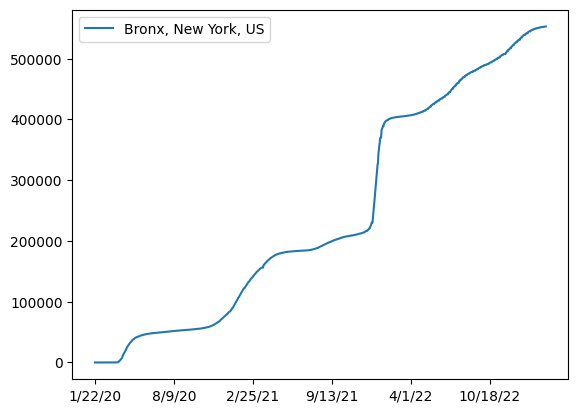

In [ ]:
df1.loc[df1['Combined_Key'] == 'Bronx, New York, US'].iloc[:, 11:].transpose().plot()

# Part 3. Daily cases at Hamilton County
## Examine the daily confirmed cases in Hamilton County, TN

<Axes: >

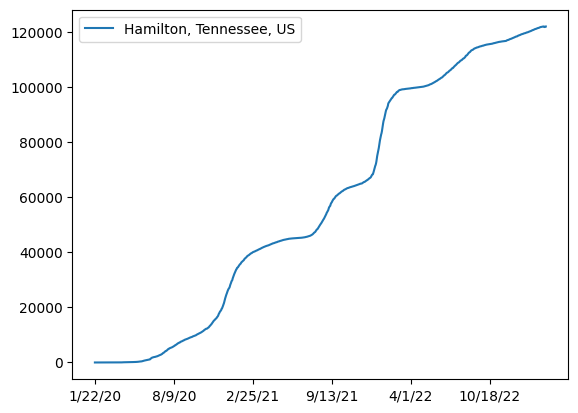

In [ ]:
df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:].transpose().plot()

In [ ]:
df_county = df1.loc[df1['Combined_Key'] == 'Bronx, New York, US'].iloc[:, 11:]

type(df_county)
df_county.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Bronx, New York, US        0        0        0        0        0        0   

                     1/28/20  1/29/20  1/30/20  1/31/20  ...  2/28/23  3/1/23  \
Bronx, New York, US        0        0        0        0  ...   552283  552341   

                     3/2/23  3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  \
Bronx, New York, US  552507  552610  552610  552610  552911  552962  553001   

                     3/9/23  
Bronx, New York, US  553117  

[1 rows x 1143 columns]

<Axes: >

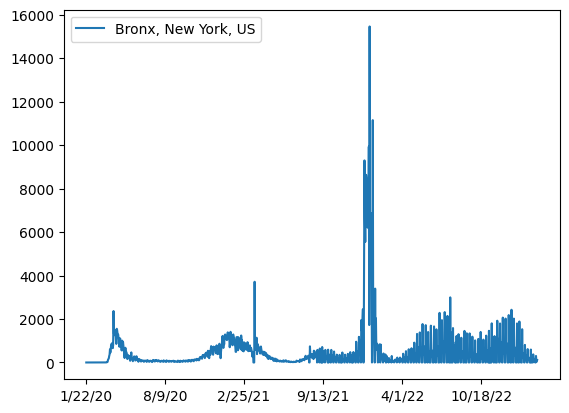

In [ ]:
df_county.transpose().diff(axis=0).plot()

<Axes: >

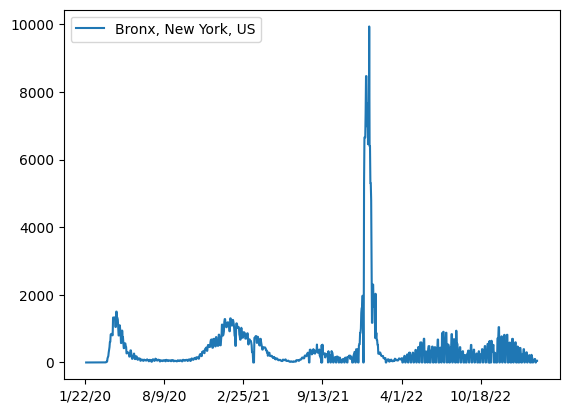

In [ ]:
df_county.transpose().diff(axis=0).rolling(window=3).median().plot()

<Axes: >

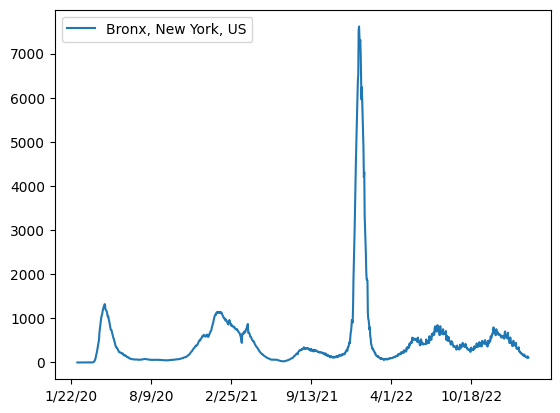

In [ ]:
df_county.transpose().diff(axis=0).rolling(window=15).mean().plot()

#Part 4. Overlay Google Mobility estimate with daily COVID-19 cases. 

https://www.google.com/covid19/mobility/

## Use magjic commands to download data

In [ ]:
! wget https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip 

--2023-05-24 01:07:28--  https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip
Resolving www.gstatic.com (www.gstatic.com)... 172.253.115.94, 2607:f8b0:4004:c09::5e
Connecting to www.gstatic.com (www.gstatic.com)|172.253.115.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98167694 (94M) [application/zip]
Saving to: ‘Region_Mobility_Report_CSVs.zip’

Region_Mobility_Rep 100%[===================>]  93.62M  8.59MB/s    in 11s     

2023-05-24 01:07:39 (8.66 MB/s) - ‘Region_Mobility_Report_CSVs.zip’ saved [98167694/98167694]



In [ ]:
! unzip /content/Region_Mobility_Report_CSVs.zip

Archive:  /content/Region_Mobility_Report_CSVs.zip
  inflating: 2020_AE_Region_Mobility_Report.csv  
  inflating: 2020_AF_Region_Mobility_Report.csv  
  inflating: 2020_AG_Region_Mobility_Report.csv  
  inflating: 2020_AO_Region_Mobility_Report.csv  
  inflating: 2020_AR_Region_Mobility_Report.csv  
  inflating: 2020_AT_Region_Mobility_Report.csv  
  inflating: 2020_AU_Region_Mobility_Report.csv  
  inflating: 2020_AW_Region_Mobility_Report.csv  
  inflating: 2020_BA_Region_Mobility_Report.csv  
  inflating: 2020_BB_Region_Mobility_Report.csv  
  inflating: 2020_BD_Region_Mobility_Report.csv  
  inflating: 2020_BE_Region_Mobility_Report.csv  
  inflating: 2020_BF_Region_Mobility_Report.csv  
  inflating: 2020_BG_Region_Mobility_Report.csv  
  inflating: 2020_BH_Region_Mobility_Report.csv  
  inflating: 2020_BJ_Region_Mobility_Report.csv  
  inflating: 2020_BO_Region_Mobility_Report.csv  
  inflating: 2020_BR_Region_Mobility_Report.csv  
  inflating: 2020_BS_Region_Mobility_Report.csv  

In [ ]:
! ls *US*csv

2020_US_Region_Mobility_Report.csv  2022_US_Region_Mobility_Report.csv
2021_US_Region_Mobility_Report.csv


## Read csv into pandas dataframe, and merge them

In [ ]:
df_US20 = pd.read_csv( "2020_US_Region_Mobility_Report.csv")
df_US21 = pd.read_csv( "2021_US_Region_Mobility_Report.csv")
df_US22 = pd.read_csv( "2022_US_Region_Mobility_Report.csv")

In [ ]:
df_US = pd.concat( [df_US20, df_US21, df_US22] )
df_US.head()

country_region_code country_region sub_region_1 sub_region_2  metro_area  \
0                  US  United States          NaN          NaN         NaN   
1                  US  United States          NaN          NaN         NaN   
2                  US  United States          NaN          NaN         NaN   
3                  US  United States          NaN          NaN         NaN   
4                  US  United States          NaN          NaN         NaN   

  iso_3166_2_code  census_fips_code                     place_id        date  \
0             NaN               NaN  ChIJCzYy5IS16lQRQrfeQ5K5Oxw  2020-02-15   
1             NaN               NaN  ChIJCzYy5IS16lQRQrfeQ5K5Oxw  2020-02-16   
2             NaN               NaN  ChIJCzYy5IS16lQRQrfeQ5K5Oxw  2020-02-17   
3             NaN               NaN  ChIJCzYy5IS16lQRQrfeQ5K5Oxw  2020-02-18   
4             NaN               NaN  ChIJCzYy5IS16lQRQrfeQ5K5Oxw  2020-02-19   

   retail_and_recreation_percent_change_from_baseline  \
0                                                6.0    
1                                                7.0    
2                                                6.0    
3                                                0.0    
4                                                2.0    

   grocery_and_pharmacy_percent_change_from_baseline  \
0                                                2.0   
1                                                1.0   
2                                                0.0   
3                                               -1.0   
4                                                0.0   

   parks_percent_change_from_baseline  \
0                                15.0   
1                                16.0   
2                                28.0   
3                                 6.0   
4                                 8.0   

   transit_stations_percent_change_from_baseline  \
0                                            3.0   
1                                            2.0   
2                                           -9.0   
3                                            1.0   
4                                            1.0   

   workplaces_percent_change_from_baseline  \
0                                      2.0   
1                                      0.0   
2                                    -24.0   
3                                      0.0   
4                                      1.0   

   residential_percent_change_from_baseline  
0                                      -1.0  
1                                      -1.0  
2                                       5.0  
3                                       1.0  
4                                       0.0

In [ ]:
df_US.tail()

country_region_code country_region sub_region_1   sub_region_2  \
747964                  US  United States      Wyoming  Weston County   
747965                  US  United States      Wyoming  Weston County   
747966                  US  United States      Wyoming  Weston County   
747967                  US  United States      Wyoming  Weston County   
747968                  US  United States      Wyoming  Weston County   

        metro_area iso_3166_2_code  census_fips_code  \
747964         NaN             NaN           56045.0   
747965         NaN             NaN           56045.0   
747966         NaN             NaN           56045.0   
747967         NaN             NaN           56045.0   
747968         NaN             NaN           56045.0   

                           place_id        date  \
747964  ChIJd4Rqhed3YocR7ubT5-HgoJg  2022-10-10   
747965  ChIJd4Rqhed3YocR7ubT5-HgoJg  2022-10-11   
747966  ChIJd4Rqhed3YocR7ubT5-HgoJg  2022-10-12   
747967  ChIJd4Rqhed3YocR7ubT5-HgoJg  2022-10-13   
747968  ChIJd4Rqhed3YocR7ubT5-HgoJg  2022-10-14   

        retail_and_recreation_percent_change_from_baseline  \
747964                                                NaN    
747965                                                NaN    
747966                                                NaN    
747967                                                NaN    
747968                                                NaN    

        grocery_and_pharmacy_percent_change_from_baseline  \
747964                                                NaN   
747965                                                NaN   
747966                                                NaN   
747967                                                NaN   
747968                                                NaN   

        parks_percent_change_from_baseline  \
747964                                 NaN   
747965                                 NaN   
747966                                 NaN   
747967                                 NaN   
747968                                 NaN   

        transit_stations_percent_change_from_baseline  \
747964                                            NaN   
747965                                            NaN   
747966                                            NaN   
747967                                            NaN   
747968                                            NaN   

        workplaces_percent_change_from_baseline  \
747964                                    -26.0   
747965                                    -20.0   
747966                                    -17.0   
747967                                    -15.0   
747968                                     -8.0   

        residential_percent_change_from_baseline  
747964                                       NaN  
747965                                       NaN  
747966                                       NaN  
747967                                       NaN  
747968                                       NaN

## convert date into objects

In [ ]:
df_US.index = pd.to_datetime(df_US.date)
df_US.index

DatetimeIndex(['2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24',
               ...
               '2022-10-03', '2022-10-04', '2022-10-05', '2022-10-06',
               '2022-10-07', '2022-10-10', '2022-10-11', '2022-10-12',
               '2022-10-13', '2022-10-14'],
              dtype='datetime64[ns]', name='date', length=2511994, freq=None)

## Pick a speciric County of a state

### Example of Hamilton TN moblility

In [ ]:
#df_US.loc[ df_US.sub_region_1=='Tennessee'  ]

df_county_GM = df_US.loc[ ( df_US.sub_region_1=='New York' ) & (df_US.sub_region_2=='Bronx County') ]
df_county_GM.tail()

country_region_code country_region sub_region_1  sub_region_2  \
date                                                                       
2022-10-11                  US  United States     New York  Bronx County   
2022-10-12                  US  United States     New York  Bronx County   
2022-10-13                  US  United States     New York  Bronx County   
2022-10-14                  US  United States     New York  Bronx County   
2022-10-15                  US  United States     New York  Bronx County   

            metro_area iso_3166_2_code  census_fips_code  \
date                                                       
2022-10-11         NaN             NaN           36005.0   
2022-10-12         NaN             NaN           36005.0   
2022-10-13         NaN             NaN           36005.0   
2022-10-14         NaN             NaN           36005.0   
2022-10-15         NaN             NaN           36005.0   

                               place_id        date  \
date                                                  
2022-10-11  ChIJBUEf6ovgwokRwlazSIxIpsk  2022-10-11   
2022-10-12  ChIJBUEf6ovgwokRwlazSIxIpsk  2022-10-12   
2022-10-13  ChIJBUEf6ovgwokRwlazSIxIpsk  2022-10-13   
2022-10-14  ChIJBUEf6ovgwokRwlazSIxIpsk  2022-10-14   
2022-10-15  ChIJBUEf6ovgwokRwlazSIxIpsk  2022-10-15   

            retail_and_recreation_percent_change_from_baseline  \
date                                                             
2022-10-11                                              -25.0    
2022-10-12                                              -27.0    
2022-10-13                                              -33.0    
2022-10-14                                              -25.0    
2022-10-15                                              -24.0    

            grocery_and_pharmacy_percent_change_from_baseline  \
date                                                            
2022-10-11                                              -16.0   
2022-10-12                                              -18.0   
2022-10-13                                              -21.0   
2022-10-14                                              -14.0   
2022-10-15                                              -20.0   

            parks_percent_change_from_baseline  \
date                                             
2022-10-11                               -24.0   
2022-10-12                               -23.0   
2022-10-13                               -40.0   
2022-10-14                               -21.0   
2022-10-15                                 6.0   

            transit_stations_percent_change_from_baseline  \
date                                                        
2022-10-11                                          -28.0   
2022-10-12                                          -29.0   
2022-10-13                                          -32.0   
2022-10-14                                          -27.0   
2022-10-15                                          -19.0   

            workplaces_percent_change_from_baseline  \
date                                                  
2022-10-11                                    -29.0   
2022-10-12                                    -30.0   
2022-10-13                                    -30.0   
2022-10-14                                    -28.0   
2022-10-15                                    -21.0   

            residential_percent_change_from_baseline  
date                                                  
2022-10-11                                       4.0  
2022-10-12                                       3.0  
2022-10-13                                       5.0  
2022-10-14                                       4.0  
2022-10-15                                       0.0

## Daily COVID at this specific county

In [ ]:
df_county_COVID = df1.loc[df1['Combined_Key'] == 'Bronx, New York, US'].iloc[:, 11:].transpose().diff(axis=0).rolling(window=7).mean()
#df_county_COVID = df1.loc[df1['Combined_Key'] == 'Harris, Texas, US'].iloc[:, 11:].transpose().diff(axis=0)

type(df_county_COVID)
df_county_COVID.tail()

Bronx, New York, US
3/5/23           107.285714
3/6/23            97.142857
3/7/23            97.000000
3/8/23            94.285714
3/9/23            87.142857

In [ ]:
df_county_COVID.index = pd.to_datetime(df_county_COVID.index)
#df_county_COVID.rename(columns={0:"daily_cases"}, inplace=True)
df_county_COVID.columns=["daily_cases"]
df_county_COVID.tail()

daily_cases
2023-03-05   107.285714
2023-03-06    97.142857
2023-03-07    97.000000
2023-03-08    94.285714
2023-03-09    87.142857

### Merge mobiligy with COVID data for Hamilton, TN

In [ ]:
df_county_COVID

daily_cases
2020-01-22          NaN
2020-01-23          NaN
2020-01-24          NaN
2020-01-25          NaN
2020-01-26          NaN
...                 ...
2023-03-05   107.285714
2023-03-06    97.142857
2023-03-07    97.000000
2023-03-08    94.285714
2023-03-09    87.142857

[1143 rows x 1 columns]

In [ ]:
df_county_GM

country_region_code country_region sub_region_1  sub_region_2  \
date                                                                       
2020-02-15                  US  United States     New York  Bronx County   
2020-02-16                  US  United States     New York  Bronx County   
2020-02-17                  US  United States     New York  Bronx County   
2020-02-18                  US  United States     New York  Bronx County   
2020-02-19                  US  United States     New York  Bronx County   
...                        ...            ...          ...           ...   
2022-10-11                  US  United States     New York  Bronx County   
2022-10-12                  US  United States     New York  Bronx County   
2022-10-13                  US  United States     New York  Bronx County   
2022-10-14                  US  United States     New York  Bronx County   
2022-10-15                  US  United States     New York  Bronx County   

            metro_area iso_3166_2_code  census_fips_code  \
date                                                       
2020-02-15         NaN             NaN           36005.0   
2020-02-16         NaN             NaN           36005.0   
2020-02-17         NaN             NaN           36005.0   
2020-02-18         NaN             NaN           36005.0   
2020-02-19         NaN             NaN           36005.0   
...                ...             ...               ...   
2022-10-11         NaN             NaN           36005.0   
2022-10-12         NaN             NaN           36005.0   
2022-10-13         NaN             NaN           36005.0   
2022-10-14         NaN             NaN           36005.0   
2022-10-15         NaN             NaN           36005.0   

                               place_id        date  \
date                                                  
2020-02-15  ChIJBUEf6ovgwokRwlazSIxIpsk  2020-02-15   
2020-02-16  ChIJBUEf6ovgwokRwlazSIxIpsk  2020-02-16   
2020-02-17  ChIJBUEf6ovgwokRwlazSIxIpsk  2020-02-17   
2020-02-18  ChIJBUEf6ovgwokRwlazSIxIpsk  2020-02-18   
2020-02-19  ChIJBUEf6ovgwokRwlazSIxIpsk  2020-02-19   
...                                 ...         ...   
2022-10-11  ChIJBUEf6ovgwokRwlazSIxIpsk  2022-10-11   
2022-10-12  ChIJBUEf6ovgwokRwlazSIxIpsk  2022-10-12   
2022-10-13  ChIJBUEf6ovgwokRwlazSIxIpsk  2022-10-13   
2022-10-14  ChIJBUEf6ovgwokRwlazSIxIpsk  2022-10-14   
2022-10-15  ChIJBUEf6ovgwokRwlazSIxIpsk  2022-10-15   

            retail_and_recreation_percent_change_from_baseline  \
date                                                             
2020-02-15                                                0.0    
2020-02-16                                               -1.0    
2020-02-17                                                3.0    
2020-02-18                                               -2.0    
2020-02-19                                                2.0    
...                                                       ...    
2022-10-11                                              -25.0    
2022-10-12                                              -27.0    
2022-10-13                                              -33.0    
2022-10-14                                              -25.0    
2022-10-15                                              -24.0    

            grocery_and_pharmacy_percent_change_from_baseline  \
date                                                            
2020-02-15                                               -8.0   
2020-02-16                                               -4.0   
2020-02-17                                               -8.0   
2020-02-18                                               -6.0   
2020-02-19                                               -6.0   
...                                                       ...   
2022-10-11                                              -16.0   
2022-10-12                                              -18.0   
2022-10-13      

In [ ]:
df_county = pd.merge(df_county_COVID, df_county_GM, left_index=True, right_index=True)
df_county.tail()

daily_cases country_region_code country_region sub_region_1  \
2022-10-11   274.000000                  US  United States     New York   
2022-10-12   270.285714                  US  United States     New York   
2022-10-13   265.142857                  US  United States     New York   
2022-10-14   227.428571                  US  United States     New York   
2022-10-15   227.428571                  US  United States     New York   

            sub_region_2  metro_area iso_3166_2_code  census_fips_code  \
2022-10-11  Bronx County         NaN             NaN           36005.0   
2022-10-12  Bronx County         NaN             NaN           36005.0   
2022-10-13  Bronx County         NaN             NaN           36005.0   
2022-10-14  Bronx County         NaN             NaN           36005.0   
2022-10-15  Bronx County         NaN             NaN           36005.0   

                               place_id        date  \
2022-10-11  ChIJBUEf6ovgwokRwlazSIxIpsk  2022-10-11   
2022-10-12  ChIJBUEf6ovgwokRwlazSIxIpsk  2022-10-12   
2022-10-13  ChIJBUEf6ovgwokRwlazSIxIpsk  2022-10-13   
2022-10-14  ChIJBUEf6ovgwokRwlazSIxIpsk  2022-10-14   
2022-10-15  ChIJBUEf6ovgwokRwlazSIxIpsk  2022-10-15   

            retail_and_recreation_percent_change_from_baseline  \
2022-10-11                                              -25.0    
2022-10-12                                              -27.0    
2022-10-13                                              -33.0    
2022-10-14                                              -25.0    
2022-10-15                                              -24.0    

            grocery_and_pharmacy_percent_change_from_baseline  \
2022-10-11                                              -16.0   
2022-10-12                                              -18.0   
2022-10-13                                              -21.0   
2022-10-14                                              -14.0   
2022-10-15                                              -20.0   

            parks_percent_change_from_baseline  \
2022-10-11                               -24.0   
2022-10-12                               -23.0   
2022-10-13                               -40.0   
2022-10-14                               -21.0   
2022-10-15                                 6.0   

            transit_stations_percent_change_from_baseline  \
2022-10-11                                          -28.0   
2022-10-12                                          -29.0   
2022-10-13                                          -32.0   
2022-10-14                                          -27.0   
2022-10-15                                          -19.0   

            workplaces_percent_change_from_baseline  \
2022-10-11                                    -29.0   
2022-10-12                                    -30.0   
2022-10-13                                    -30.0   
2022-10-14                                    -28.0   
2022-10-15                                    -21.0   

            residential_percent_change_from_baseline  
2022-10-11                                       4.0  
2022-10-12                                       3.0  
2022-10-13                                       5.0  
2022-10-14                                       4.0  
2022-10-15                                       0.0

## Plot

<Axes: >

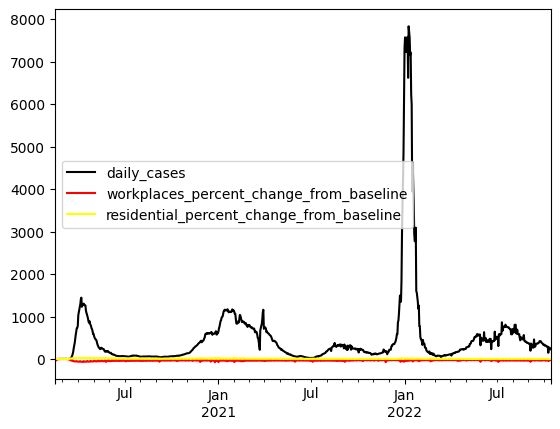

In [ ]:
df_county[['daily_cases', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']].plot(color=["black", "red", "yellow"])

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

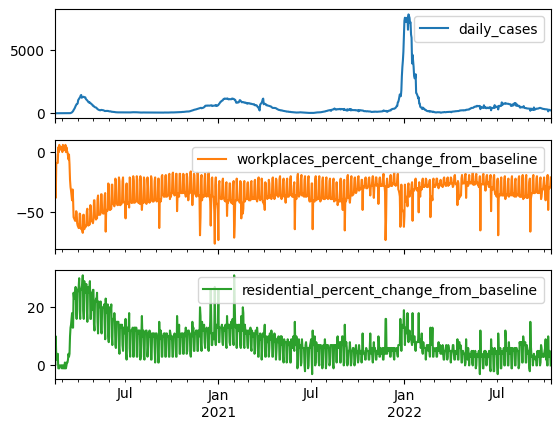

In [ ]:
df_county[['daily_cases', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']].plot(subplots=True)

### Plot with normalized data and moving windows

Using Z-score to normalize data for overlays. See https://en.wikipedia.org/wiki/Standard_score 

<Axes: >

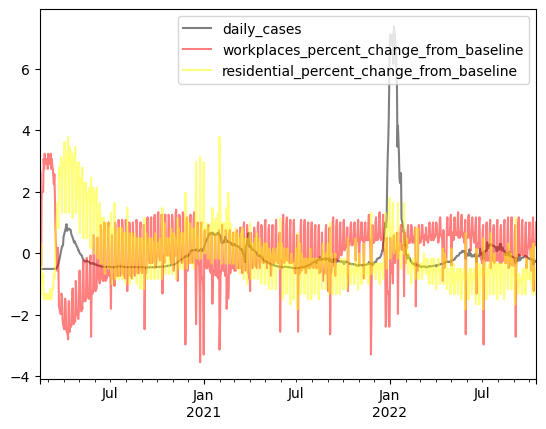

In [ ]:
df_county2 = df_county[['daily_cases', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']]

df_county2 = ( df_county2 - df_county2.mean() ) / df_county2.std() 

df_county2.loc['2020-02-01':'2022-10-15', ].plot(color=["black", "red", "yellow"], alpha=0.5)

 Try to remove the weekly fluctuation by 15-day moving window

<Axes: >

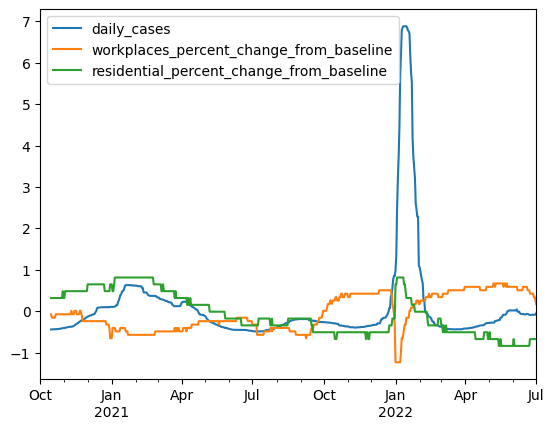

In [ ]:
df_county2.loc['2020-10-01':'2022-07-01', ].rolling(window=15).median().plot()

# Part 5. Examine the cases by States.

In [ ]:

df1.loc[ :, 'Province_State']

Autauga, Alabama, US       Alabama
Baldwin, Alabama, US       Alabama
Barbour, Alabama, US       Alabama
Bibb, Alabama, US          Alabama
Blount, Alabama, US        Alabama
                            ...   
Teton, Wyoming, US         Wyoming
Uinta, Wyoming, US         Wyoming
Unassigned, Wyoming, US    Wyoming
Washakie, Wyoming, US      Wyoming
Weston, Wyoming, US        Wyoming
Name: Province_State, Length: 3342, dtype: object

In [ ]:
groupby_state = df1.iloc[:,11:].groupby(df1['Province_State'])
type( groupby_state )

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:
df_by_state = groupby_state.sum()
type( df_by_state )

pandas.core.frame.DataFrame

In [ ]:
df_by_state.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Province_State                                                                  
Alabama               0        0        0        0        0        0        0   
Alaska                0        0        0        0        0        0        0   
American Samoa        0        0        0        0        0        0        0   
Arizona               0        0        0        0        1        1        1   
Arkansas              0        0        0        0        0        0        0   

                1/29/20  1/30/20  1/31/20  ...  2/28/23   3/1/23   3/2/23  \
Province_State                             ...                              
Alabama               0        0        0  ...  1638348  1642062  1642062   
Alaska                0        0        0  ...   307073   307073   307073   
American Samoa        0        0        0  ...     8320     8320     8320   
Arizona               1        1        1  ...  2434631  2440294  2440294   
Arkansas              0        0        0  ...  1004752  1004752  1005212   

                 3/3/23   3/4/23   3/5/23   3/6/23   3/7/23   3/8/23   3/9/23  
Province_State                                                                 
Alabama         1642062  1642062  1642062  1642062  1642062  1644533  1644533  
Alaska           307073   307073   307073   307073   307655   307655   307655  
American Samoa     8320     8320     8320     8320     8320     8320     8320  
Arizona         2440294  2440294  2440294  2440294  2440294  2443514  2443514  
Arkansas        1005464  1005790  1005847  1005930  1006336  1006622  1006883  

[5 rows x 1143 columns]

<Axes: >

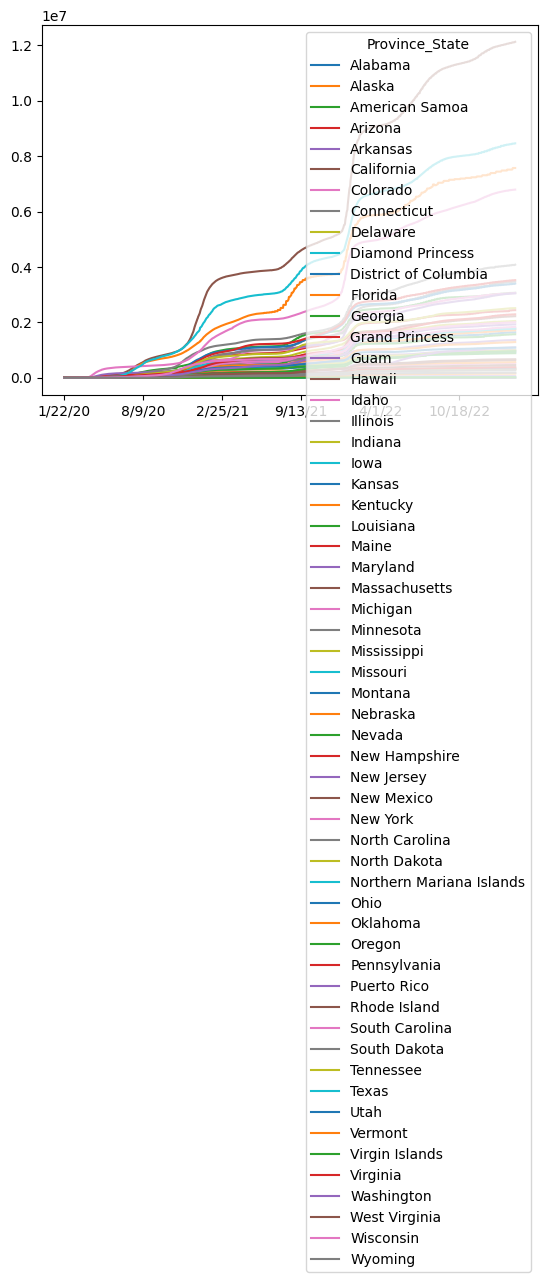

In [ ]:
df_by_state.transpose().plot()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

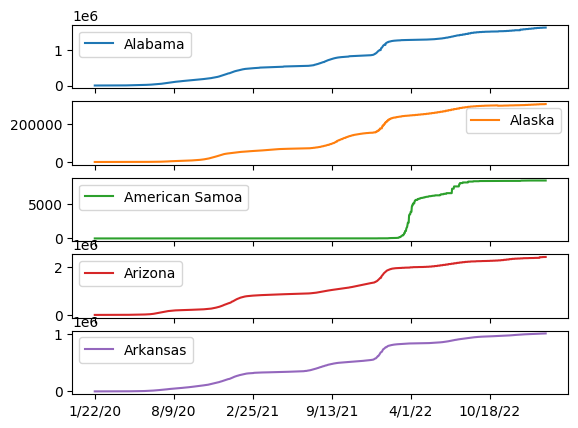

In [ ]:
df_by_state.transpose().iloc[:,0:5].plot(subplots=True)

array([<Axes: >], dtype=object)

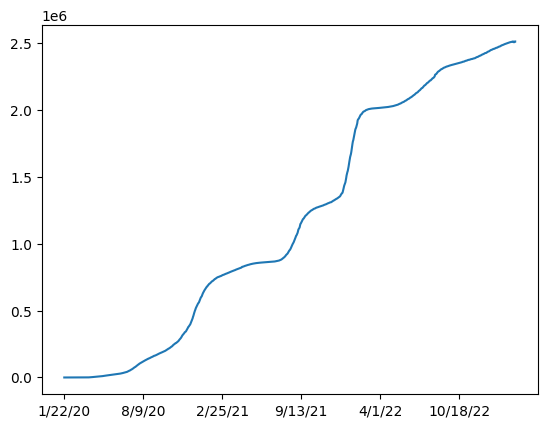

In [ ]:
df_by_state.transpose().loc[:,"Tennessee"].plot(subplots=True)

In [ ]:
df_by_state.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Province_State                                                                  
Alabama               0        0        0        0        0        0        0   
Alaska                0        0        0        0        0        0        0   
American Samoa        0        0        0        0        0        0        0   
Arizona               0        0        0        0        1        1        1   
Arkansas              0        0        0        0        0        0        0   

                1/29/20  1/30/20  1/31/20  ...  2/28/23   3/1/23   3/2/23  \
Province_State                             ...                              
Alabama               0        0        0  ...  1638348  1642062  1642062   
Alaska                0        0        0  ...   307073   307073   307073   
American Samoa        0        0        0  ...     8320     8320     8320   
Arizona               1        1        1  ...  2434631  2440294  2440294   
Arkansas              0        0        0  ...  1004752  1004752  1005212   

                 3/3/23   3/4/23   3/5/23   3/6/23   3/7/23   3/8/23   3/9/23  
Province_State                                                                 
Alabama         1642062  1642062  1642062  1642062  1642062  1644533  1644533  
Alaska           307073   307073   307073   307073   307655   307655   307655  
American Samoa     8320     8320     8320     8320     8320     8320     8320  
Arizona         2440294  2440294  2440294  2440294  2440294  2443514  2443514  
Arkansas        1005464  1005790  1005847  1005930  1006336  1006622  1006883  

[5 rows x 1143 columns]

In [ ]:
# df_by_state.loc['Tennessee'][11:].transpose().plot() #This is bit problematic on the columns

<Axes: >

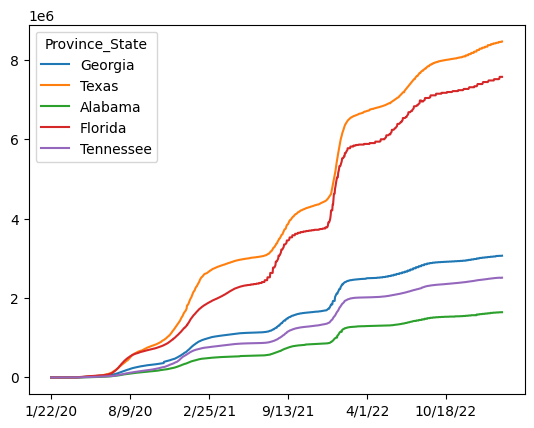

In [ ]:
df_by_state.loc[['Georgia', 'Texas', 'Alabama', 'Florida', 'Tennessee']].transpose().plot() #Here, Texas and Tennessee are row-index

<Axes: >

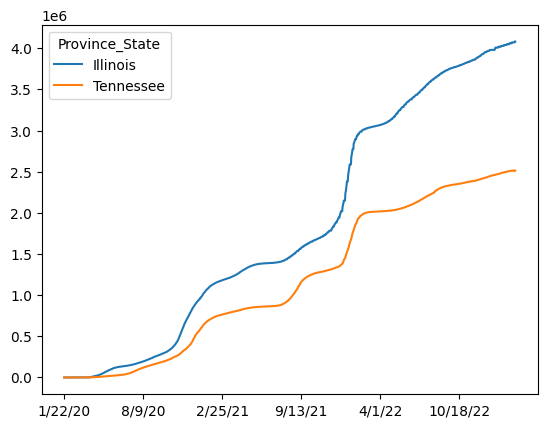

In [ ]:
df_by_state.transpose()[['Illinois', 'Tennessee']].plot() #Here, Texas ans Tennessee are columns

## How to examine the new cases daily? 

### diff() on a test dataframe

In [ ]:
dataset = [(2, 4, 6, 8),
           (10, 12, 14, 18),
           (20, 22, 24, 26),
           (28, 30, 32, 34)];

df_test = pd.DataFrame(dataset, columns = ("A", "B", "C", "D" ));


In [ ]:
df_test.diff(axis=0) #by row

A     B     C     D
0   NaN   NaN   NaN   NaN
1   8.0   8.0   8.0  10.0
2  10.0  10.0  10.0   8.0
3   8.0   8.0   8.0   8.0

In [ ]:
df_test.diff(axis=1) #by column

A  B  C  D
0 NaN  2  2  2
1 NaN  2  2  4
2 NaN  2  2  2
3 NaN  2  2  2

### diff() on US covid19 data set
 JHU cases are by row, and we need to calculate difference between columns

In [ ]:
df_by_state.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Province_State                                                                  
Alabama               0        0        0        0        0        0        0   
Alaska                0        0        0        0        0        0        0   
American Samoa        0        0        0        0        0        0        0   
Arizona               0        0        0        0        1        1        1   
Arkansas              0        0        0        0        0        0        0   

                1/29/20  1/30/20  1/31/20  ...  2/28/23   3/1/23   3/2/23  \
Province_State                             ...                              
Alabama               0        0        0  ...  1638348  1642062  1642062   
Alaska                0        0        0  ...   307073   307073   307073   
American Samoa        0        0        0  ...     8320     8320     8320   
Arizona               1        1        1  ...  2434631  2440294  2440294   
Arkansas              0        0        0  ...  1004752  1004752  1005212   

                 3/3/23   3/4/23   3/5/23   3/6/23   3/7/23   3/8/23   3/9/23  
Province_State                                                                 
Alabama         1642062  1642062  1642062  1642062  1642062  1644533  1644533  
Alaska           307073   307073   307073   307073   307655   307655   307655  
American Samoa     8320     8320     8320     8320     8320     8320     8320  
Arizona         2440294  2440294  2440294  2440294  2440294  2443514  2443514  
Arkansas        1005464  1005790  1005847  1005930  1006336  1006622  1006883  

[5 rows x 1143 columns]

In [ ]:
df_dailycases_by_state =  df_by_state.diff(axis=1) #1 by columns
df_dailycases_by_state.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Province_State                                                                  
Alabama             NaN        0        0        0        0        0        0   
Alaska              NaN        0        0        0        0        0        0   
American Samoa      NaN        0        0        0        0        0        0   
Arizona             NaN        0        0        0        1        0        0   
Arkansas            NaN        0        0        0        0        0        0   

                1/29/20  1/30/20  1/31/20  ...  2/28/23  3/1/23  3/2/23  \
Province_State                             ...                            
Alabama               0        0        0  ...        0    3714       0   
Alaska                0        0        0  ...      450       0       0   
American Samoa        0        0        0  ...        0       0       0   
Arizona               0        0        0  ...        0    5663       0   
Arkansas              0        0        0  ...      316       0     460   

                3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
Province_State                                                          
Alabama              0       0       0       0       0    2471       0  
Alaska               0       0       0       0     582       0       0  
American Samoa       0       0       0       0       0       0       0  
Arizona              0       0       0       0       0    3220       0  
Arkansas           252     326      57      83     406     286     261  

[5 rows x 1143 columns]

<Axes: >

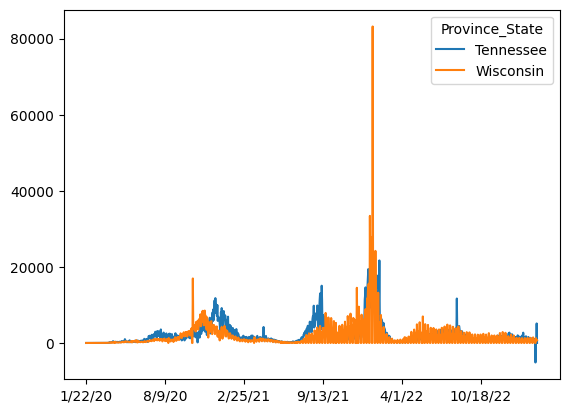

In [ ]:
df_dailycases_by_state.transpose()[['Tennessee', 'Wisconsin']].plot()

In [ ]:
df_dailycases_by_state.loc[['Tennessee', 'Texas']].iloc[:, 2:].rolling(window=3).mean()

#.rolling(window=3).mean()

1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  \
Province_State                                                                  
Tennessee           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
Texas               NaN      NaN      NaN      NaN      NaN      NaN      NaN   

                1/31/20  2/1/20  2/2/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
Province_State                           ...                                    
Tennessee           NaN     NaN     NaN  ...      NaN     NaN     NaN     NaN   
Texas               NaN     NaN     NaN  ...      NaN     NaN     NaN     NaN   

                3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
Province_State                                                  
Tennessee          NaN     NaN     NaN     NaN     NaN     NaN  
Texas              NaN     NaN     NaN     NaN     NaN     NaN  

[2 rows x 1141 columns]

In [ ]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].rolling(window=3, center=False).mean()

Province_State    Tennessee  Alaska
1/22/20                 NaN     NaN
1/23/20                 NaN     NaN
1/24/20                 NaN     NaN
1/25/20            0.000000     0.0
1/26/20            0.000000     0.0
...                     ...     ...
3/5/23         -1396.333333     0.0
3/6/23         -1637.666667     0.0
3/7/23         -1709.333333   194.0
3/8/23          1709.333333   194.0
3/9/23          1709.333333   194.0

[1143 rows x 2 columns]

In [ ]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].head()

Province_State  Tennessee  Alaska
1/22/20               NaN     NaN
1/23/20               0.0     0.0
1/24/20               0.0     0.0
1/25/20               0.0     0.0
1/26/20               0.0     0.0

<Axes: >

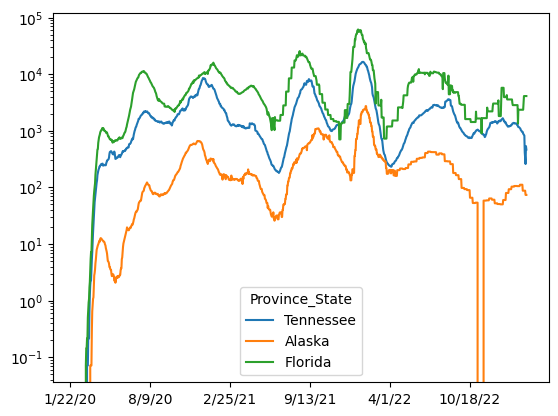

In [ ]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska', 'Florida']].rolling(window=14).mean().plot(logy=True)

array([<Axes: >, <Axes: >], dtype=object)

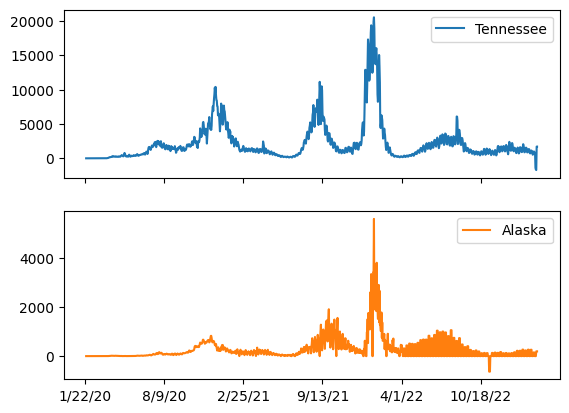

In [ ]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].rolling(window=3).mean().plot(subplots=True)

<Axes: >

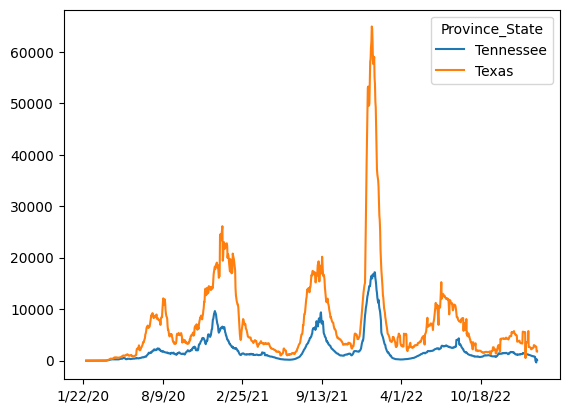

In [ ]:
df_dailycases_by_state.transpose()[['Tennessee', 'Texas']].rolling(window=7).mean().plot()

In [ ]:
df_dailycases_by_state.transpose()[['Tennessee', 'Texas']].head()

Province_State  Tennessee  Texas
1/22/20               NaN    NaN
1/23/20               0.0    0.0
1/24/20               0.0    0.0
1/25/20               0.0    0.0
1/26/20               0.0    0.0

# Part 6. Explore COVID-19 confirmed death data

In [ ]:
fullpath_deathfile = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

df_death = pd.read_csv(fullpath1, error_bad_lines=False)
df_death.head()

<ipython-input-102-68e9cf5cdf37>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_death = pd.read_csv(fullpath1, error_bad_lines=False)


UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
0  32.539527 -86.644082  ...   19732   19759   19759   19759   19759   19759   
1  30.727750 -87.722071  ...   69641   69767   69767   69767   69767   69767   
2  31.868263 -85.387129  ...    7451    7474    7474    7474    7474    7474   
3  32.996421 -87.125115  ...    8067    8087    8087    8087    8087    8087   
4  33.982109 -86.567906  ...   18616   18673   18673   18673   18673   18673   

   3/6/23  3/7/23  3/8/23  3/9/23  
0   19759   19759   19790   19790  
1   69767   69767   69860   69860  
2    7474    7474    7485    7485  
3    8087    8087    8091    8091  
4   18673   18673   18704   18704  

[5 rows x 1154 columns]

In [ ]:
df_death.columns[8:15]

Index(['Lat', 'Long_', 'Combined_Key', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20'],
      dtype='object')

In [ ]:
df_death.set_index('Combined_Key', inplace=True)
df_death.head()

UID iso2 iso3  code3    FIPS   Admin2  \
Combined_Key                                                       
Autauga, Alabama, US  84001001   US  USA    840  1001.0  Autauga   
Baldwin, Alabama, US  84001003   US  USA    840  1003.0  Baldwin   
Barbour, Alabama, US  84001005   US  USA    840  1005.0  Barbour   
Bibb, Alabama, US     84001007   US  USA    840  1007.0     Bibb   
Blount, Alabama, US   84001009   US  USA    840  1009.0   Blount   

                     Province_State Country_Region        Lat      Long_  ...  \
Combined_Key                                                              ...   
Autauga, Alabama, US        Alabama             US  32.539527 -86.644082  ...   
Baldwin, Alabama, US        Alabama             US  30.727750 -87.722071  ...   
Barbour, Alabama, US        Alabama             US  31.868263 -85.387129  ...   
Bibb, Alabama, US           Alabama             US  32.996421 -87.125115  ...   
Blount, Alabama, US         Alabama             US  33.982109 -86.567906  ...   

                      2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  3/6/23  \
Combined_Key                                                                    
Autauga, Alabama, US    19732   19759   19759   19759   19759   19759   19759   
Baldwin, Alabama, US    69641   69767   69767   69767   69767   69767   69767   
Barbour, Alabama, US     7451    7474    7474    7474    7474    7474    7474   
Bibb, Alabama, US        8067    8087    8087    8087    8087    8087    8087   
Blount, Alabama, US     18616   18673   18673   18673   18673   18673   18673   

                      3/7/23  3/8/23  3/9/23  
Combined_Key                                  
Autauga, Alabama, US   19759   19790   19790  
Baldwin, Alabama, US   69767   69860   69860  
Barbour, Alabama, US    7474    7485    7485  
Bibb, Alabama, US       8087    8091    8091  
Blount, Alabama, US    18673   18704   18704  

[5 rows x 1153 columns]

In [ ]:
dfD_daily =  df_death.iloc[:,11:].diff(axis=1) #1 by columns
dfD_daily.head()

1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Combined_Key                                                                 
Autauga, Alabama, US      NaN        0        0        0        0        0   
Baldwin, Alabama, US      NaN        0        0        0        0        0   
Barbour, Alabama, US      NaN        0        0        0        0        0   
Bibb, Alabama, US         NaN        0        0        0        0        0   
Blount, Alabama, US       NaN        0        0        0        0        0   

                      1/29/20  1/30/20  1/31/20  2/1/20  ...  2/28/23  3/1/23  \
Combined_Key                                             ...                    
Autauga, Alabama, US        0        0        0       0  ...        0      27   
Baldwin, Alabama, US        0        0        0       0  ...        0     126   
Barbour, Alabama, US        0        0        0       0  ...        0      23   
Bibb, Alabama, US           0        0        0       0  ...        0      20   
Blount, Alabama, US         0        0        0       0  ...        0      57   

                      3/2/23  3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  \
Combined_Key                                                                   
Autauga, Alabama, US       0       0       0       0       0       0      31   
Baldwin, Alabama, US       0       0       0       0       0       0      93   
Barbour, Alabama, US       0       0       0       0       0       0      11   
Bibb, Alabama, US          0       0       0       0       0       0       4   
Blount, Alabama, US        0       0       0       0       0       0      31   

                      3/9/23  
Combined_Key                  
Autauga, Alabama, US       0  
Baldwin, Alabama, US       0  
Barbour, Alabama, US       0  
Bibb, Alabama, US          0  
Blount, Alabama, US        0  

[5 rows x 1142 columns]

<Axes: >

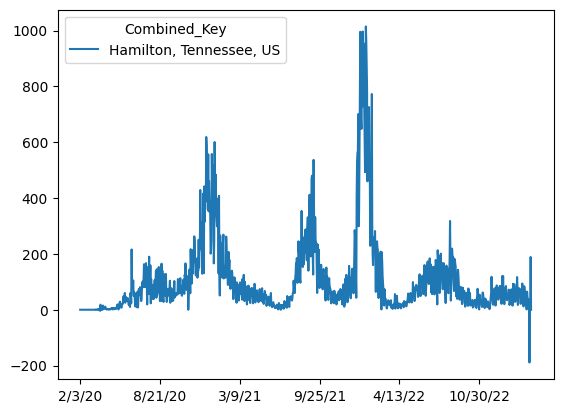

In [ ]:
dfD_daily.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:].transpose().plot()

<Axes: title={'center': 'Hamilton, TN'}>

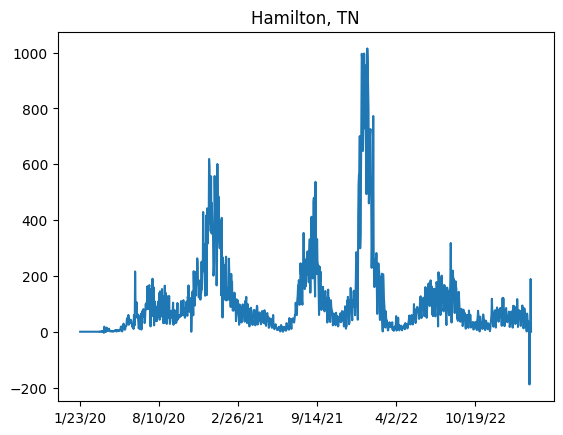

In [ ]:
dfD_daily.loc['Hamilton, Tennessee, US', ].transpose().plot(title="Hamilton, TN")

#Part 7 Explore Global Data set

In [ ]:

df2 = pd.read_csv(fullpath2, error_bad_lines=False)
df2.columns

In [ ]:
df2['Country/Region']
list(df2['Country/Region'].unique())

In [ ]:
# Countries affected
countries = df2['Country/Region'].unique().tolist()
print("\nTotal countries affected by virus: ",len(countries))
print(countries)

In [ ]:
df2by_country = df2.iloc[:, 5:].groupby(df2['Country/Region']).sum().transpose()

In [ ]:
df2by_country.head()

In [ ]:
df2by_country.index = pd.to_datetime(df2by_country.index)

In [ ]:
### Check if the dataframe contains NaN values
df2by_country.head()

In [ ]:
  df2by_country.columns[ df2by_country.columns.str.contains('US') ]

In [ ]:
  df2by_country[['US', 'France', 'India', 'Sweden']].plot(logy=True)


In [ ]:
  df2by_country[['US', 'France', 'India', 'Sweden']]['2020-05-01':].plot(logy=False)

# Alternative approach to load data from GitHub

Go to GitHub, select the csv file,  select "view as raw",  and copy the URL. 

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"

df = pd.read_csv(url)

In [ ]:
df.head

In [ ]:
? pd.read_csv()

In [ ]:
df2 = pd.read_csv(url, skiprows=5)
df2.head